In [1]:
%matplotlib inline

import sys
import tensorflow as tf
import libspn as spn
import numpy as np
from numpy import float32
import random
import matplotlib
from pylab import rcParams
import matplotlib.pyplot as plt

from spn_topo.spn_model import SpnModel, mod_compute_graph_up
from spn_topo.tbm.dataset import TopoMapDataset
from spn_topo.tbm.template import EdgeTemplate, NodeTemplate, SingleEdgeTemplate, PairEdgeTemplate, SingletonTemplate, PairTemplate, ThreeNodeTemplate
from spn_topo.tbm.spn_template import NodeTemplateSpn, InstanceSpn
from spn_topo.util import CategoryManager, ColdDatabaseManager
from spn_topo.tests.tbm.test_instance_spn import InstanceSpnExperiment
from spn_topo.tests.tbm.runner import TbmExperiment

/home/zkytony/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Paths
COLD_ROOT = "/home/zkytony/sara/sara_ws/src/sara_processing/sara_cold_processing/forpub/COLD"
RESULTS_DIR = "/home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results"
TOPO_MAP_DB_ROOT = "/home/zkytony/Documents/thesis/experiments/spn_topo/experiments/data/topo_map"

In [3]:
# Parameters
train_kwargs = {
    'db_names': sorted(['Stockholm', 'Saarbrucken']), # default train db_names
    'num_partitions': 20,
    'num_batches': 10,
    'save': True,
    'load_if_exists': False,
    'likelihood_thres': 0.5,
    'will_upsample': TbmExperiment.check_doorway_connecting,
    'upsample_rate': 10,
    'save_training_info': True,
    'skip_unknown': CategoryManager.SKIP_UNKNOWN,

    # spn_structure
    'num_decomps': 1,
    'num_subsets': 3,
    'num_mixtures': 5,
    'num_input_mixtures': 5
}


In [6]:
# Template SPNs
spn_params = {k:train_kwargs[k] for k in ['num_decomps', 'num_subsets', 'num_mixtures', 'num_input_mixtures']}
pair_node_spn = NodeTemplateSpn(PairTemplate, **spn_params)
single_node_spn = NodeTemplateSpn(SingletonTemplate, **spn_params)

Generating SPN structure...
Generating weight initialization Ops...
Initializing learning Ops...
Generating SPN structure...
Generating weight initialization Ops...
Initializing learning Ops...


In [7]:
# Experiment object
exp = InstanceSpnExperiment(TOPO_MAP_DB_ROOT, pair_node_spn, single_node_spn,
                                root_dir=RESULTS_DIR, name='C_InstanceSpnExperiment_NodeTemplate')
exp.load_training_data(*train_kwargs['db_names'], skip_unknown=train_kwargs['skip_unknown'])

Loaded 32 training sequences from database Saarbrucken
Loaded 42 training sequences from database Stockholm


In [8]:
# Train
sess = tf.Session()
print(exp.model_save_path(pair_node_spn))
train_info = exp.train_models(sess, **train_kwargs)

/home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results/C_InstanceSpnExperiment_NodeTemplate/models/PairTemplate_0_Saarbrucken-Stockholm.spn
Initializing weights...
Resetting accumulators...
EPOCH 0 BATCH 0 SAMPLES 0 9641
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -2.75736
EPOCH 0 BATCH 1 SAMPLES 9641 19282
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.54385
EPOCH 0 BATCH 2 SAMPLES 19282 28923
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.5233
EPOCH 0 BATCH 3 SAMPLES 28923 38564
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.52581
EPOCH 0 BATCH 4 SAMPLES 38564 48205
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.51957
EPOCH 0 BATCH 5 SAMPLES 48205 57846
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.5046
EPOCH 0 BATCH 6 SAMPLES 57846 67487
Smoothing:  100.0
Avg likelihood (this batch data on previous w

[INFO] [spn.JSONSaver:save] Saving SPN graph rooted in 'Node_2' to file '/home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results/C_InstanceSpnExperiment_NodeTemplate/models/PairTemplate_0_Saarbrucken-Stockholm.spn'


Smoothing:  81.8731
Avg likelihood (this batch data on previous weights): -1.48087
Avg likelihood: -1.50584658384
Saving trained PairTemplate-SPN saved to path: /home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results/C_InstanceSpnExperiment_NodeTemplate/models/PairTemplate_0_Saarbrucken-Stockholm.spn ...Initializing weights...
Resetting accumulators...
EPOCH 0 BATCH 0 SAMPLES 0 23612
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.39128
EPOCH 0 BATCH 1 SAMPLES 23612 47224
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.17772
EPOCH 0 BATCH 2 SAMPLES 47224 70836
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.1752
EPOCH 0 BATCH 3 SAMPLES 70836 94448
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.18098
EPOCH 0 BATCH 4 SAMPLES 94448 118060
Smoothing:  100.0
Avg likelihood (this batch data on previous weights): -1.17037
EPOCH 0 BATCH 5 SAMPLES 118060 141672
Smoothing:

[INFO] [spn.JSONSaver:save] Saving SPN graph rooted in 'Node_3' to file '/home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results/C_InstanceSpnExperiment_NodeTemplate/models/SingletonTemplate_0_Saarbrucken-Stockholm.spn'


Smoothing:  81.8731
Avg likelihood (this batch data on previous weights): -1.17779
Avg likelihood: -1.17533270121
Saving trained SingletonTemplate-SPN saved to path: /home/zkytony/Documents/thesis/experiments/spn_topo/experiments/results/C_InstanceSpnExperiment_NodeTemplate/models/SingletonTemplate_0_Saarbrucken-Stockholm.spn ...Saved training info. 


In [9]:
# Load testing data
MARGINAL = 'marginal'
test_kwargs = {
        'db_name': 'Freiburg', # default test db
        'test_name': 'unnamed',
        'num_partitions': 5,
        'high_likelihood': (0.5, 0.60),
        'low_likelihood': (0.40, 0.50),
        'func_mask_params': {},
        'inference_type': MARGINAL,
        'tiny_size': 4
}
exp.load_testing_data(test_kwargs['db_name'], skip_unknown=train_kwargs['skip_unknown'], tiny_size=test_kwargs['tiny_size'])
test_instances = exp.dataset.get_topo_maps(db_name=test_kwargs['db_name'], amount=30)

Loaded 498 testing sequences from database Freiburg


seq1_sunny4-5


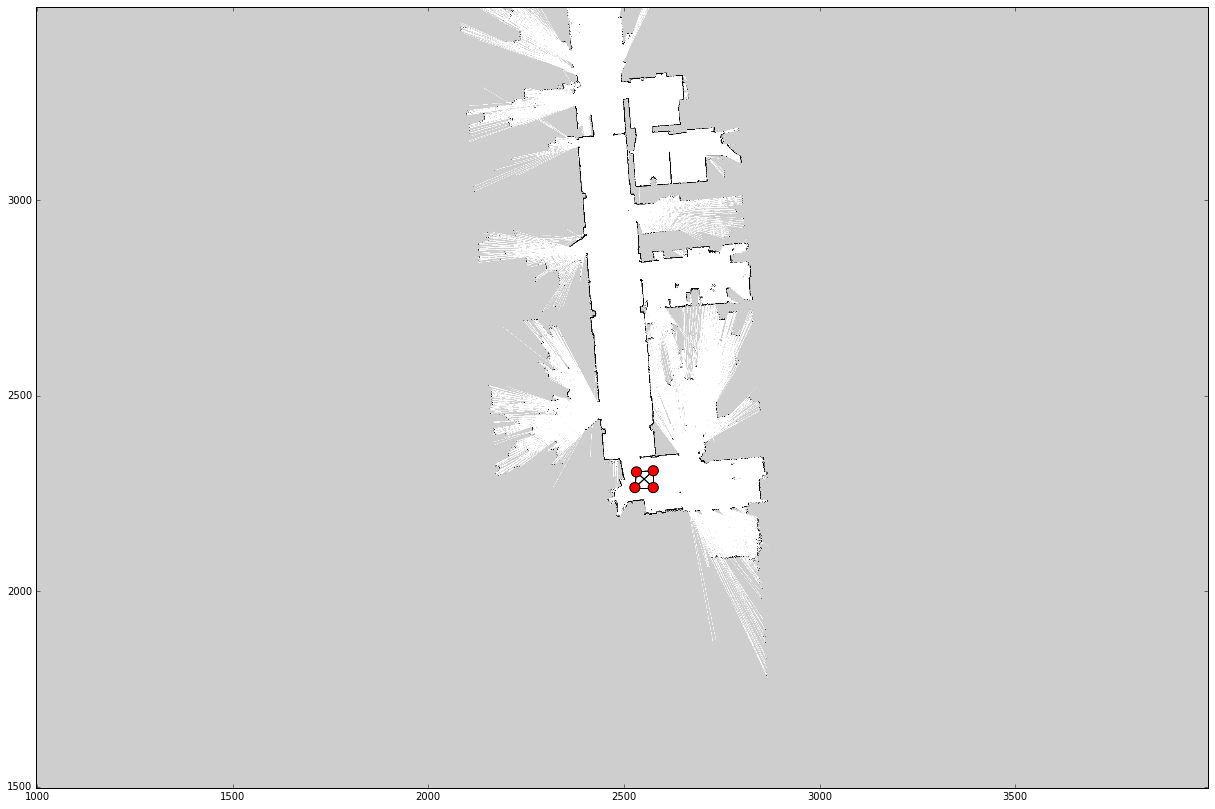

seq1_sunny3-9


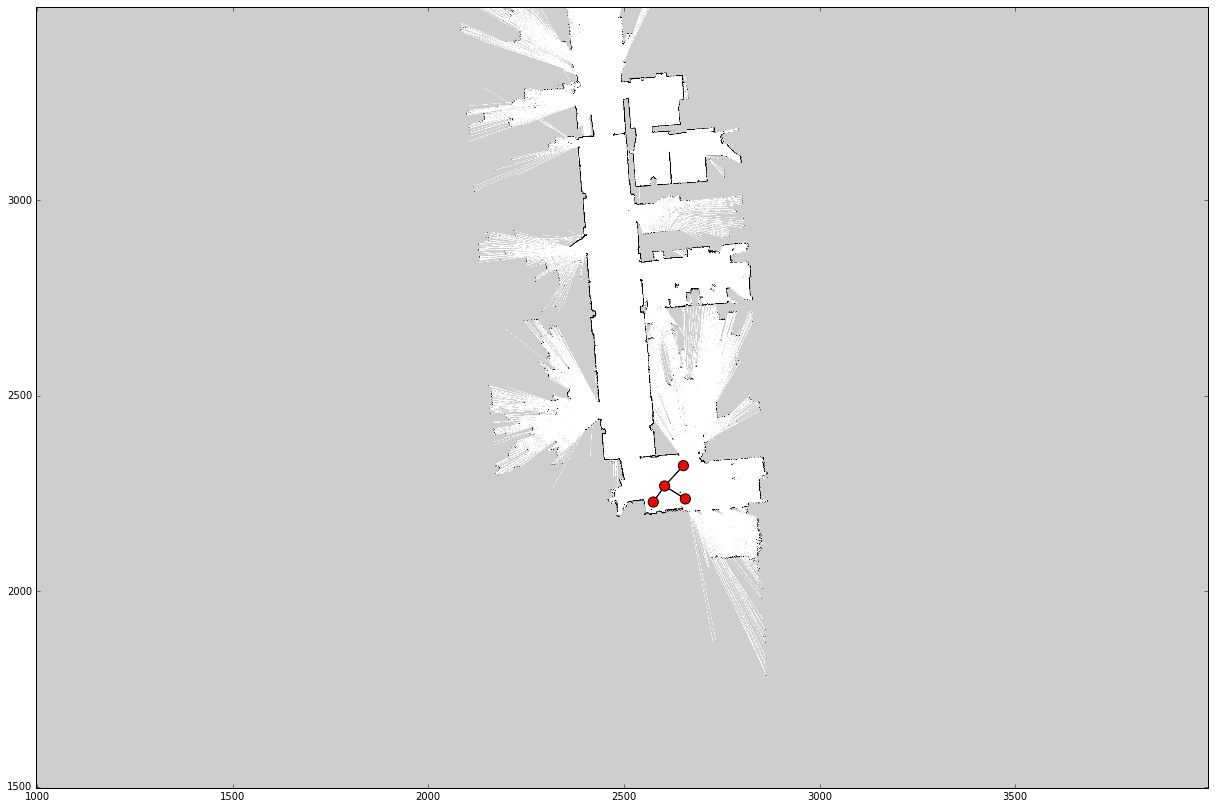

seq3_sunny1-9


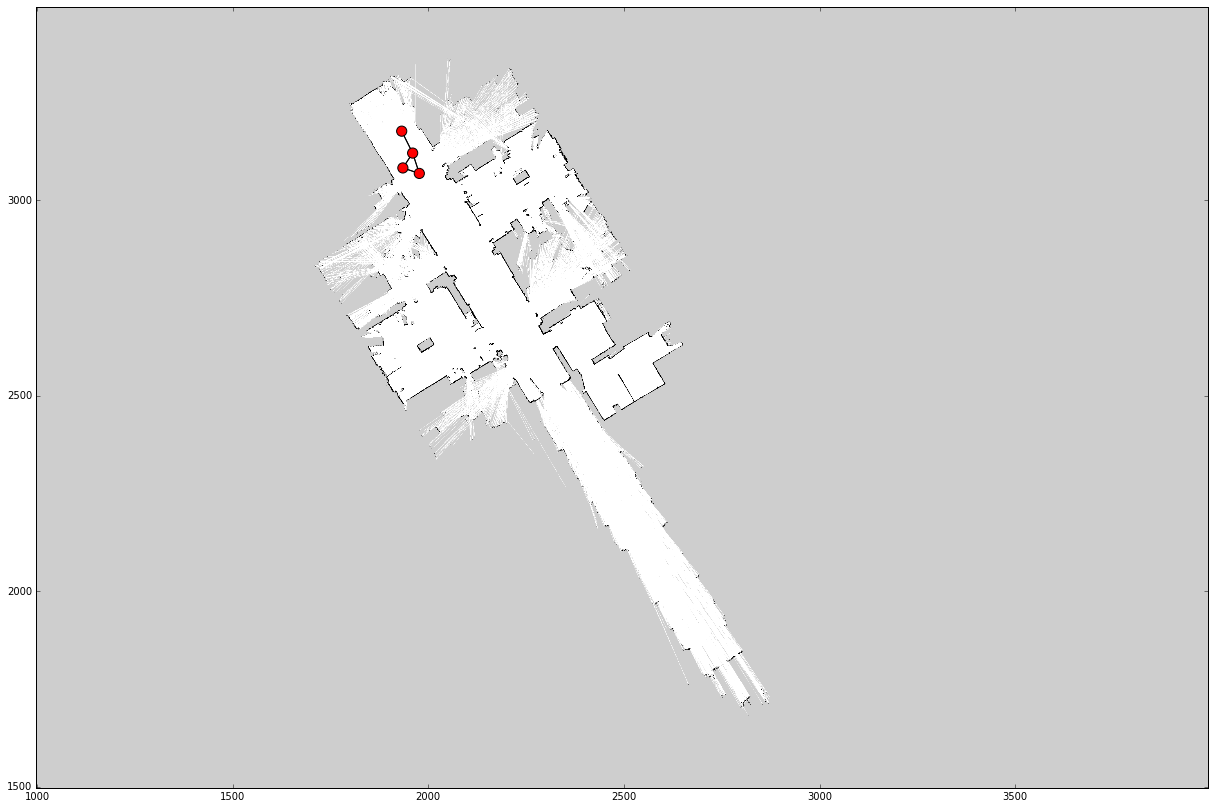

seq2_cloudy3-6


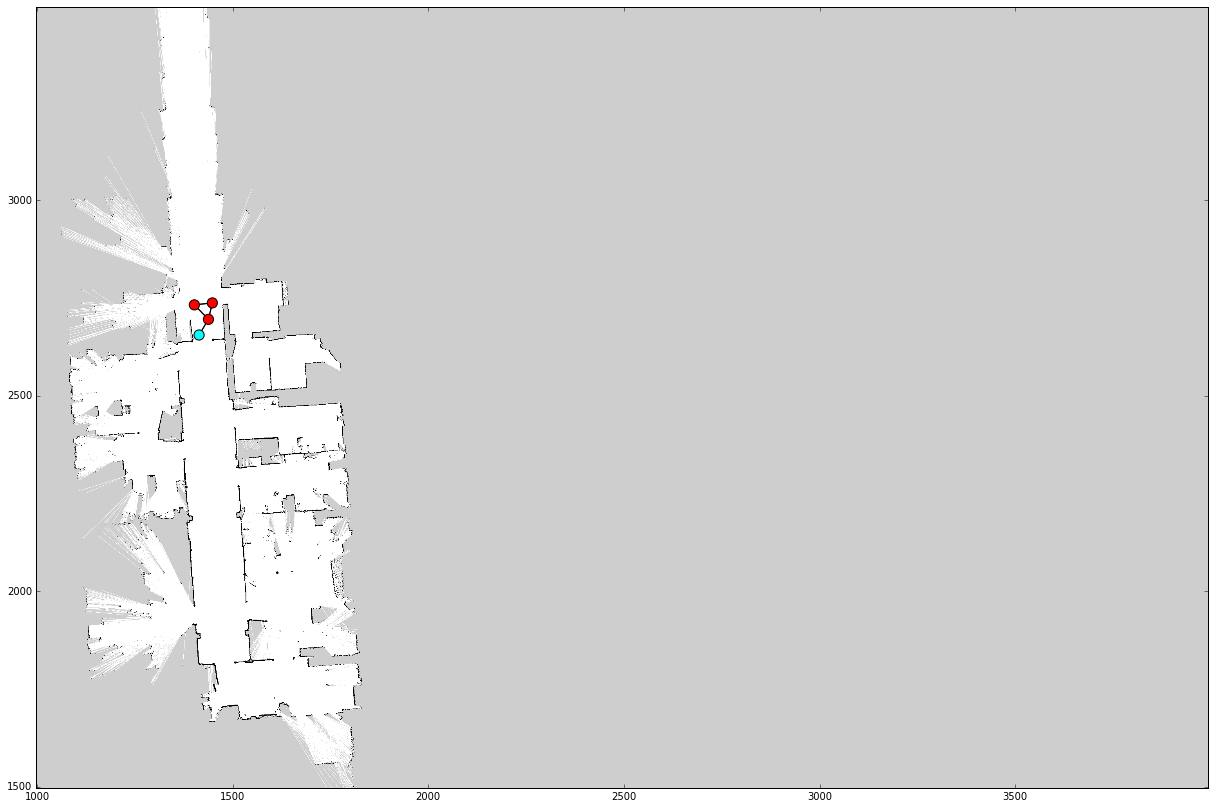

seq1_cloudy1-17


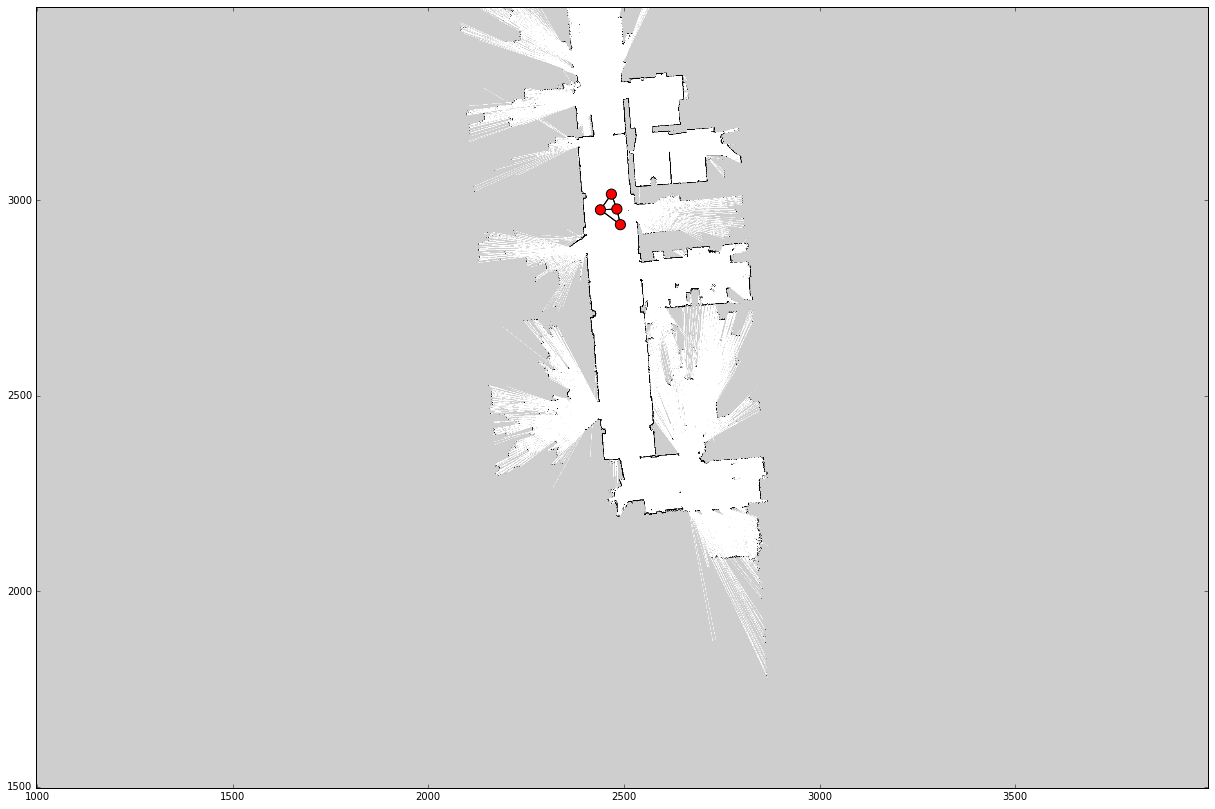

seq2_cloudy1-6


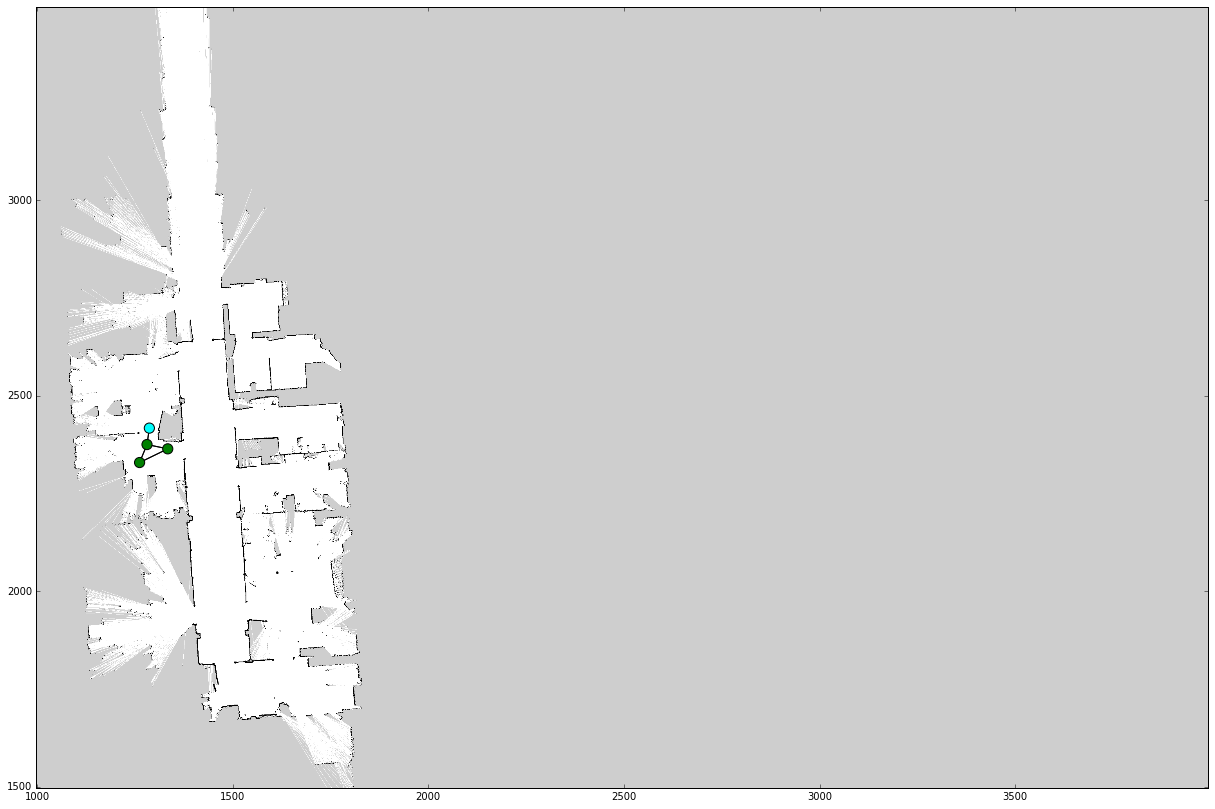

seq2_cloudy1-2


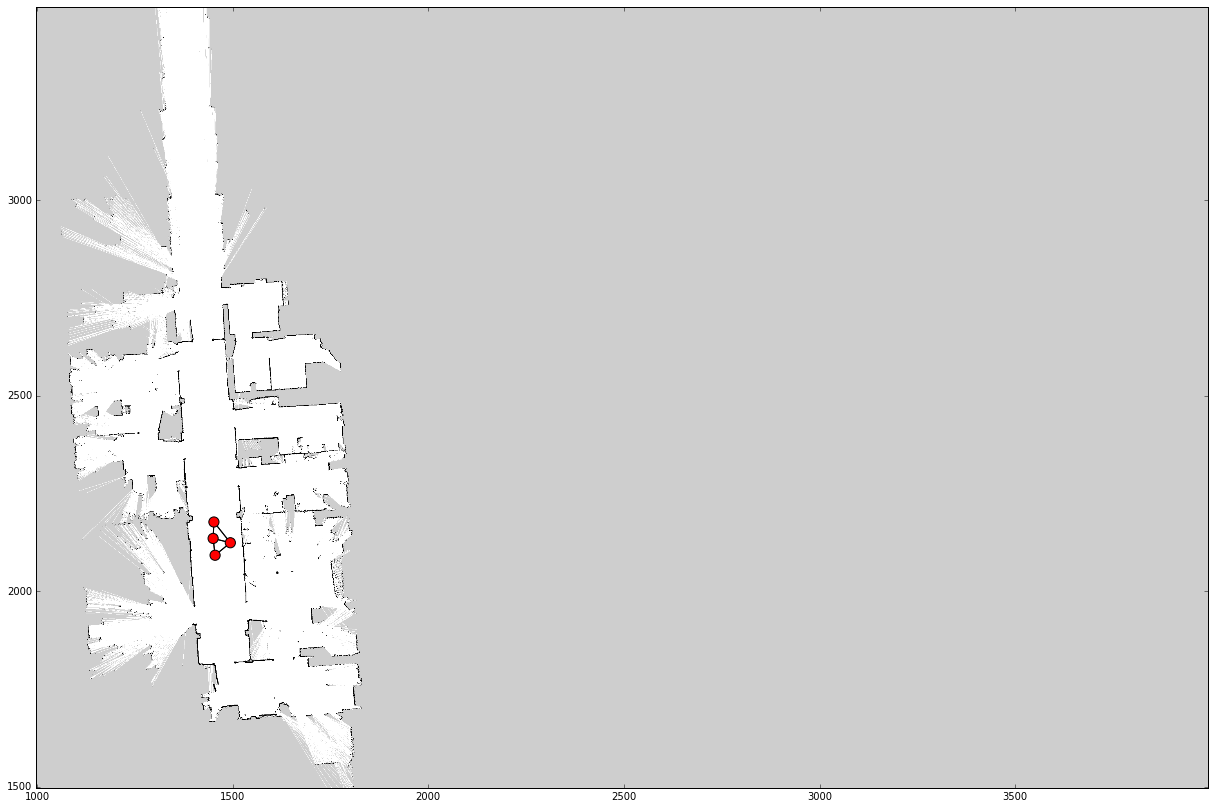

seq1_night2-5


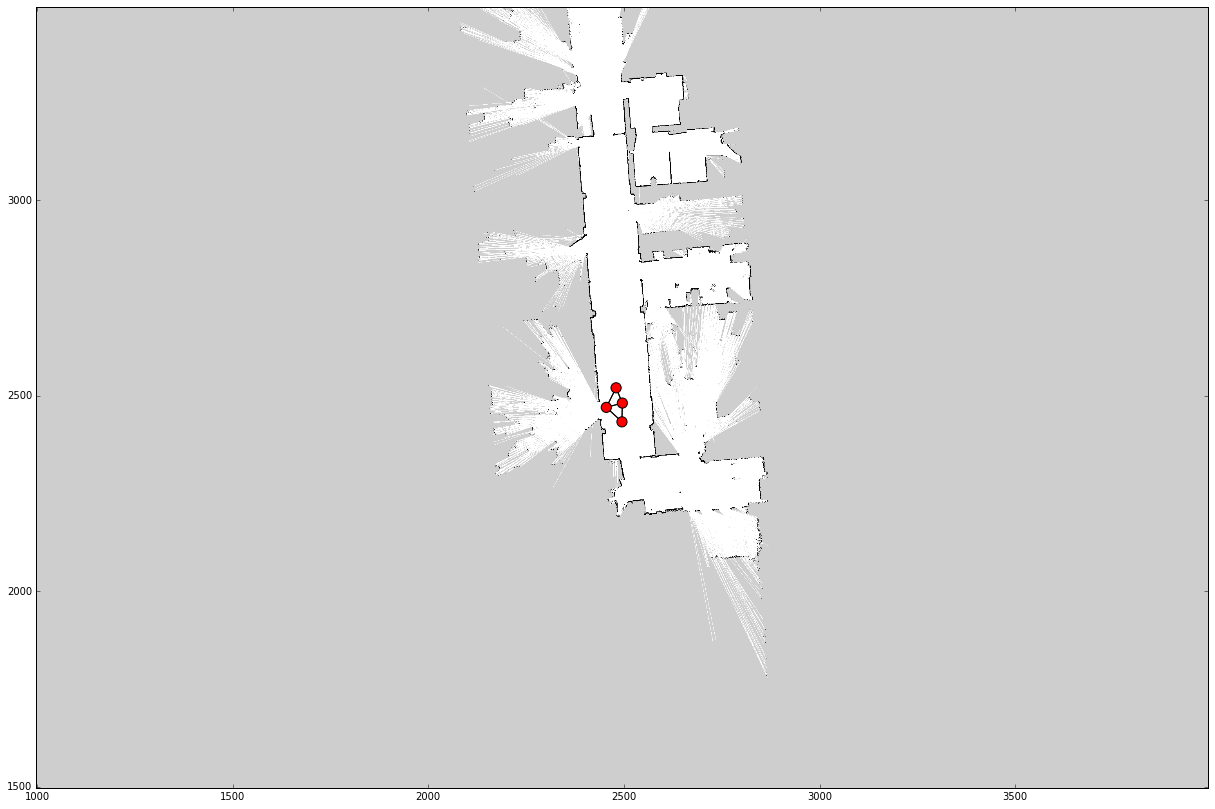

seq1_cloudy2-0


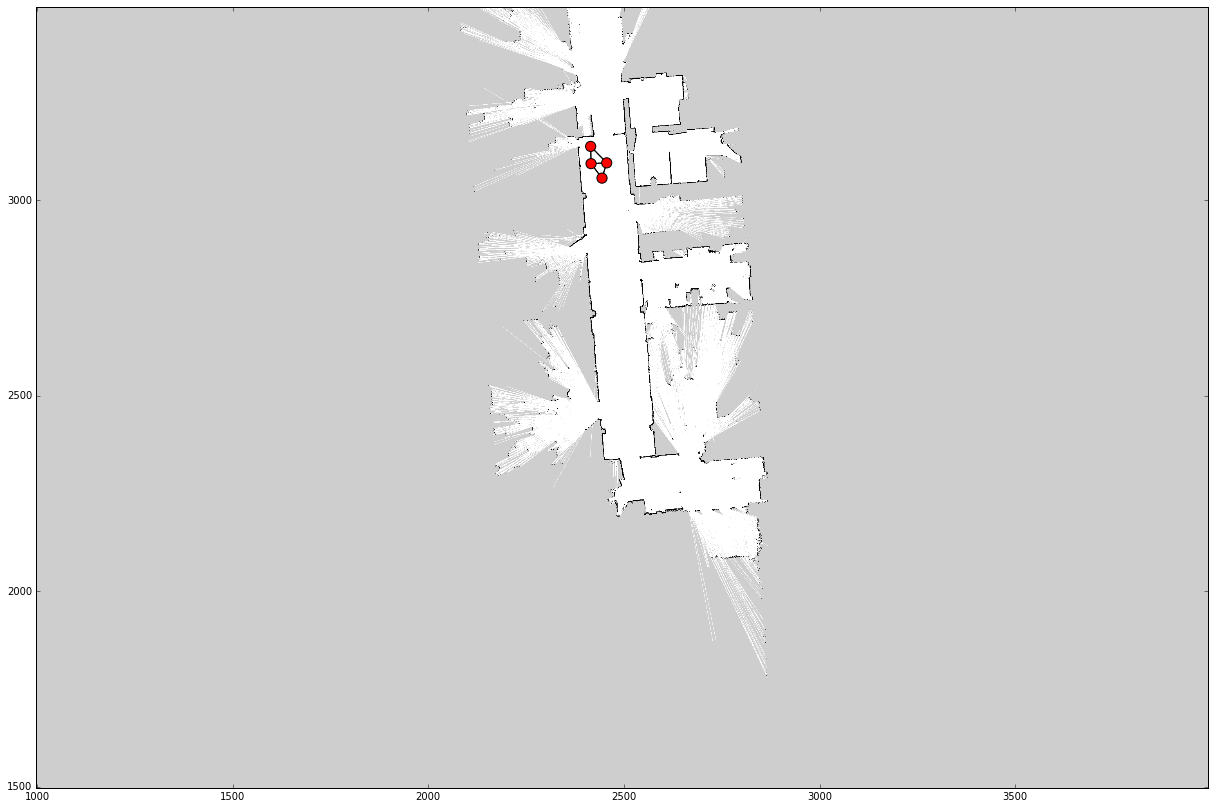

seq2_sunny3-6


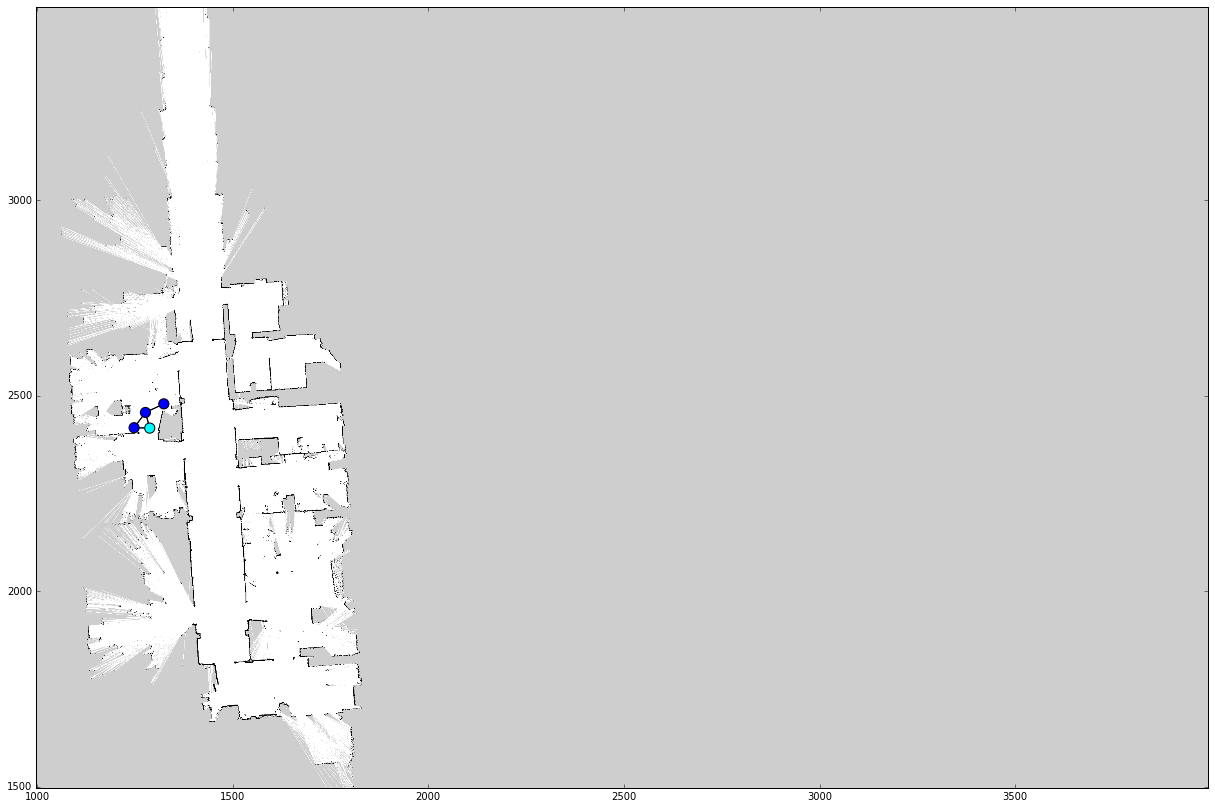

seq2_sunny2-4


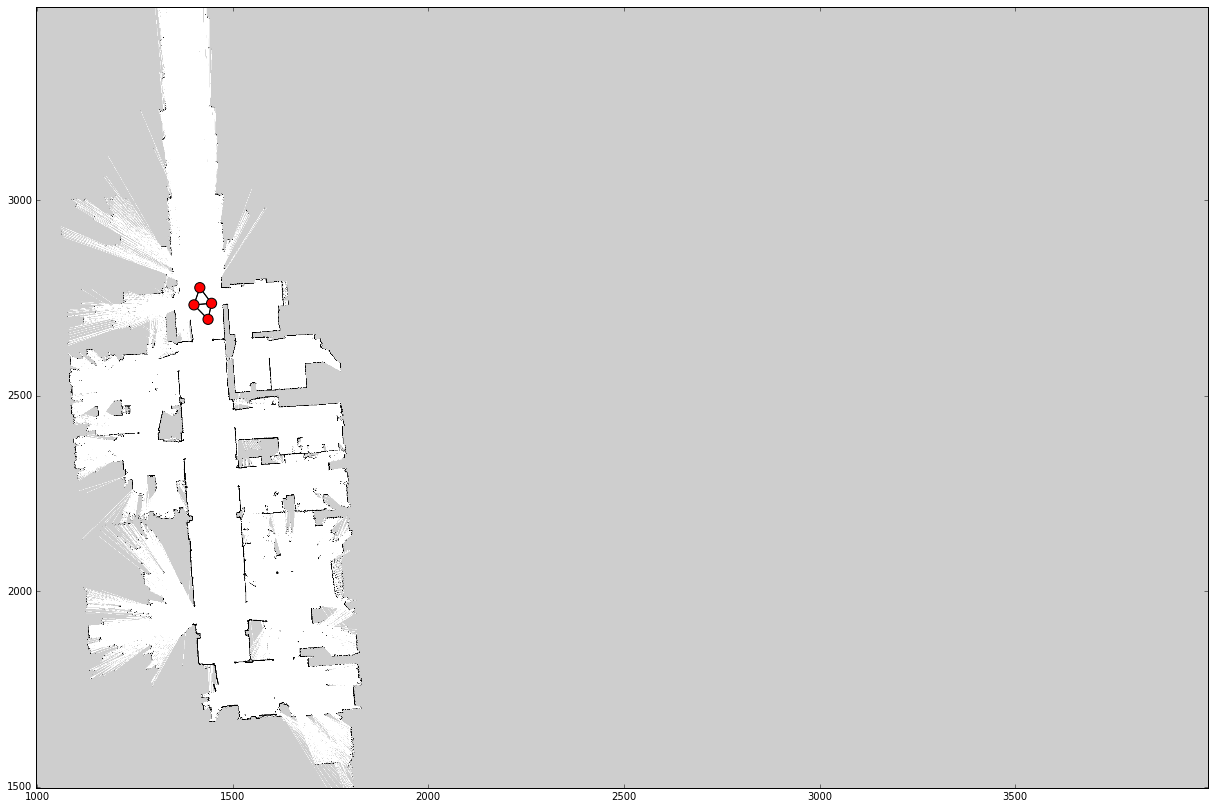

seq1_cloudy3-17


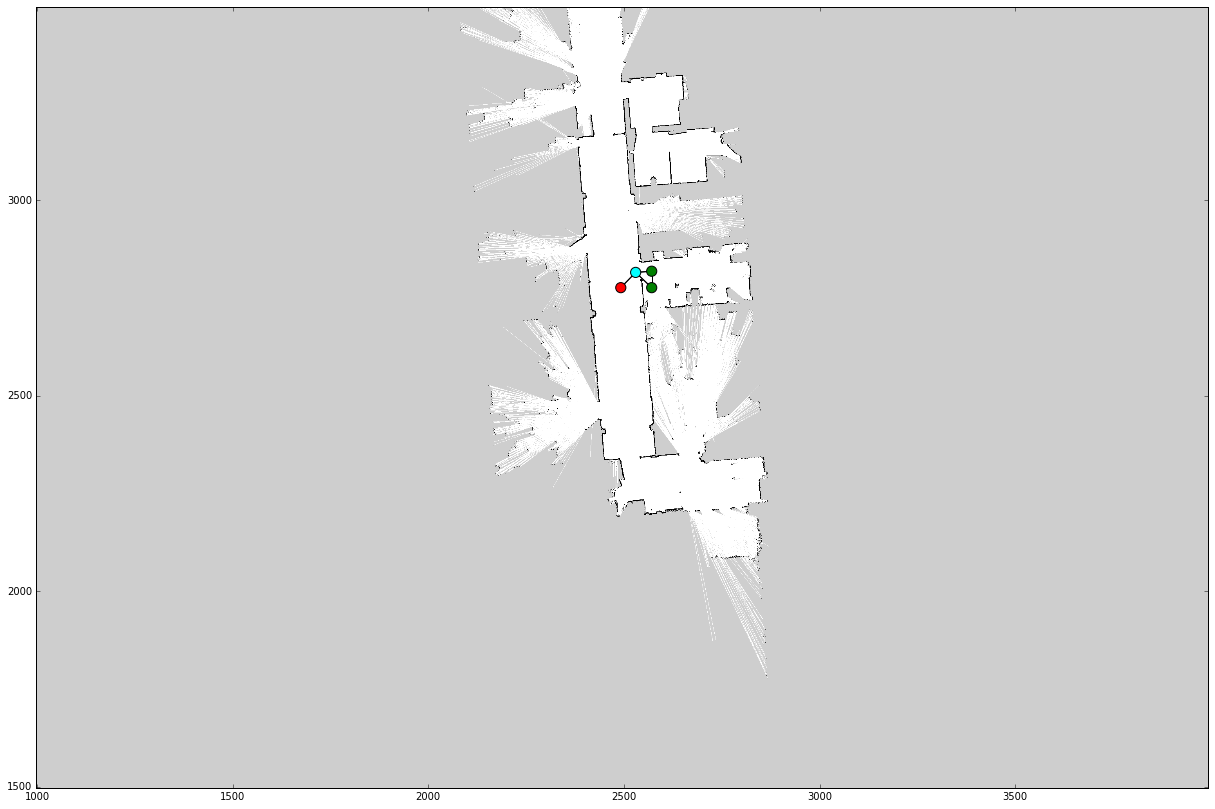

seq2_cloudy2-17


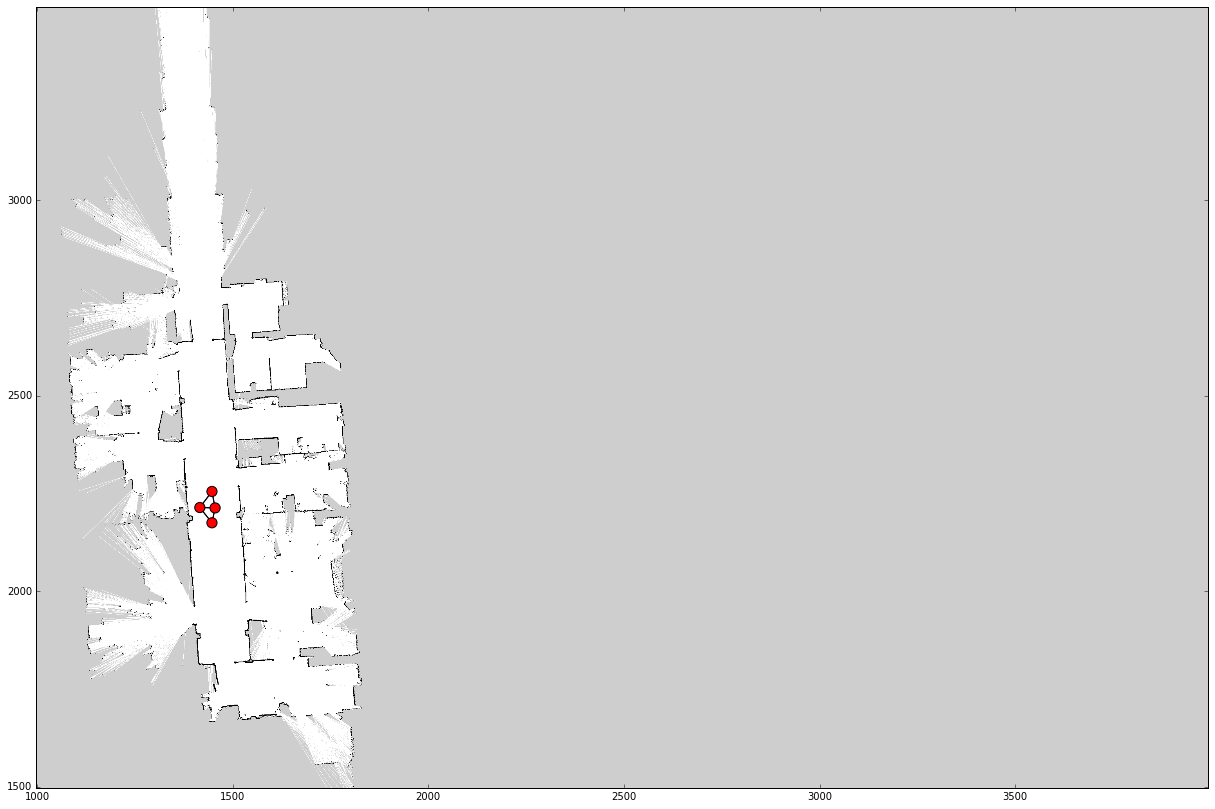

seq1_cloudy3-13


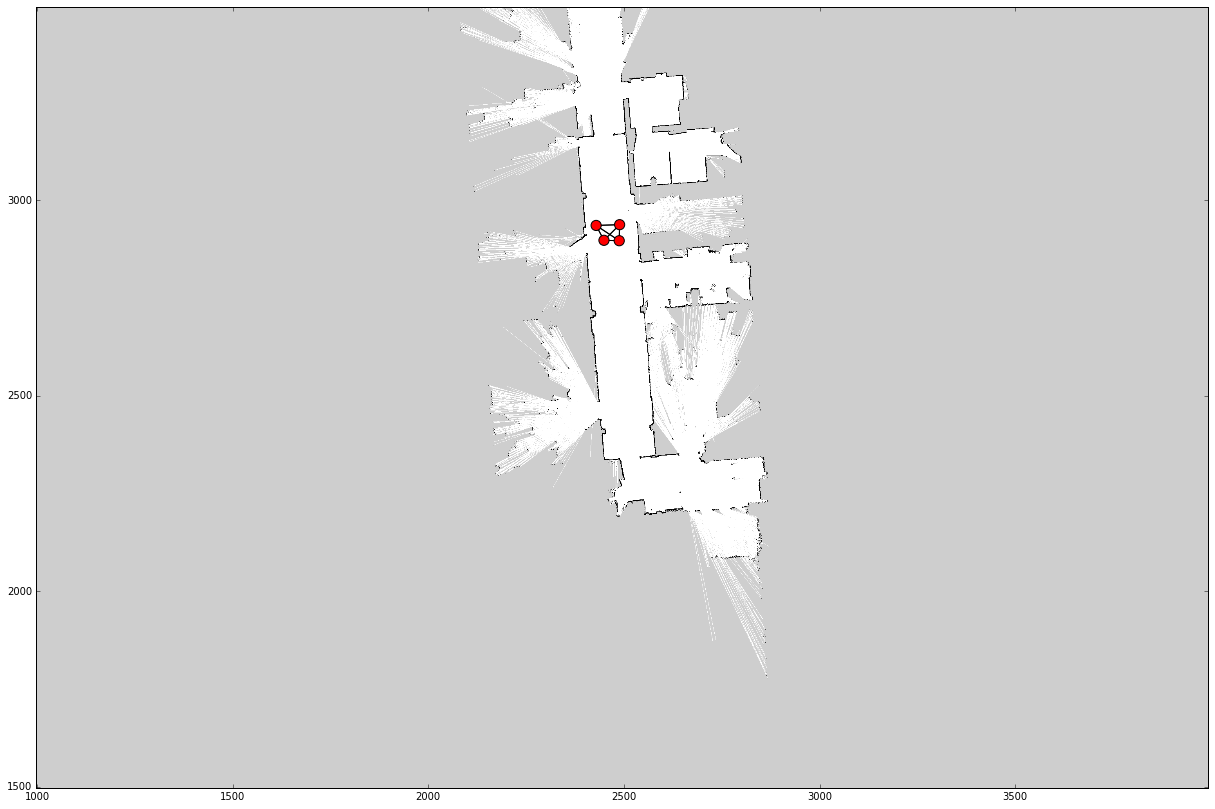

seq3_cloudy2-15


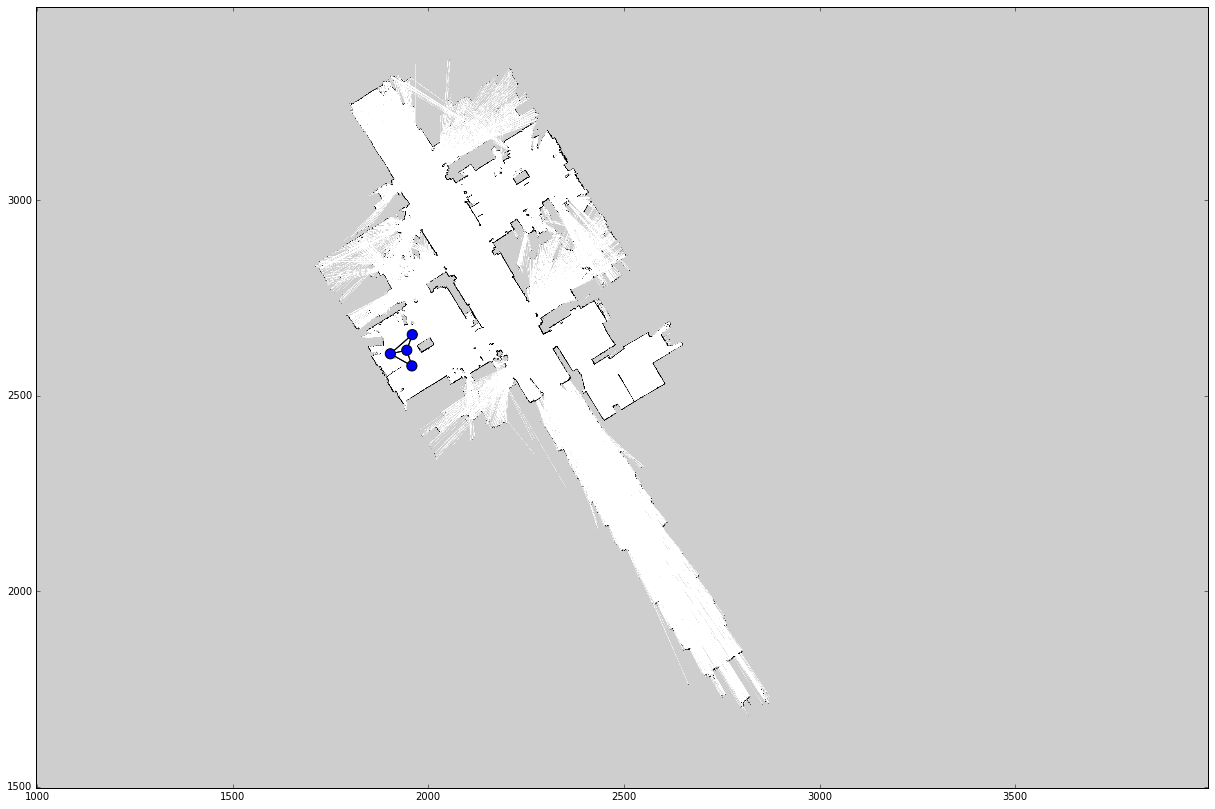

seq2_sunny2-18


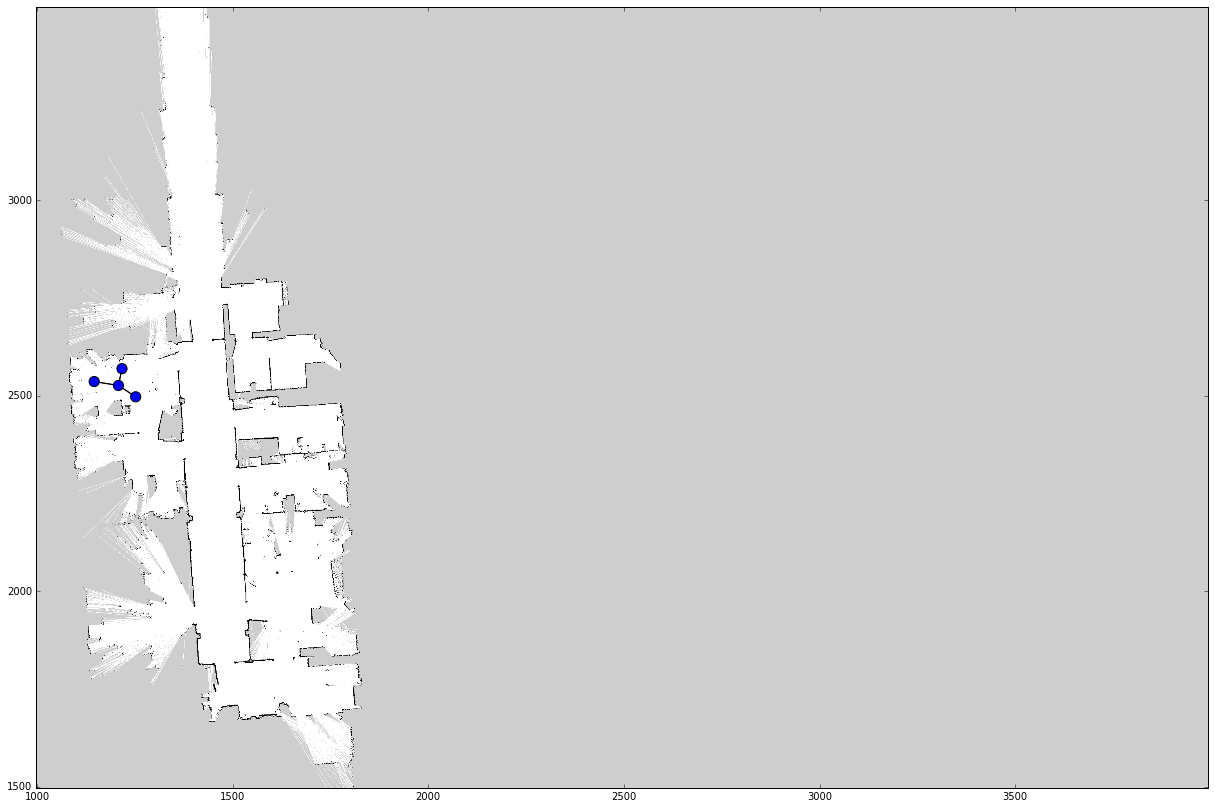

seq2_night1-4


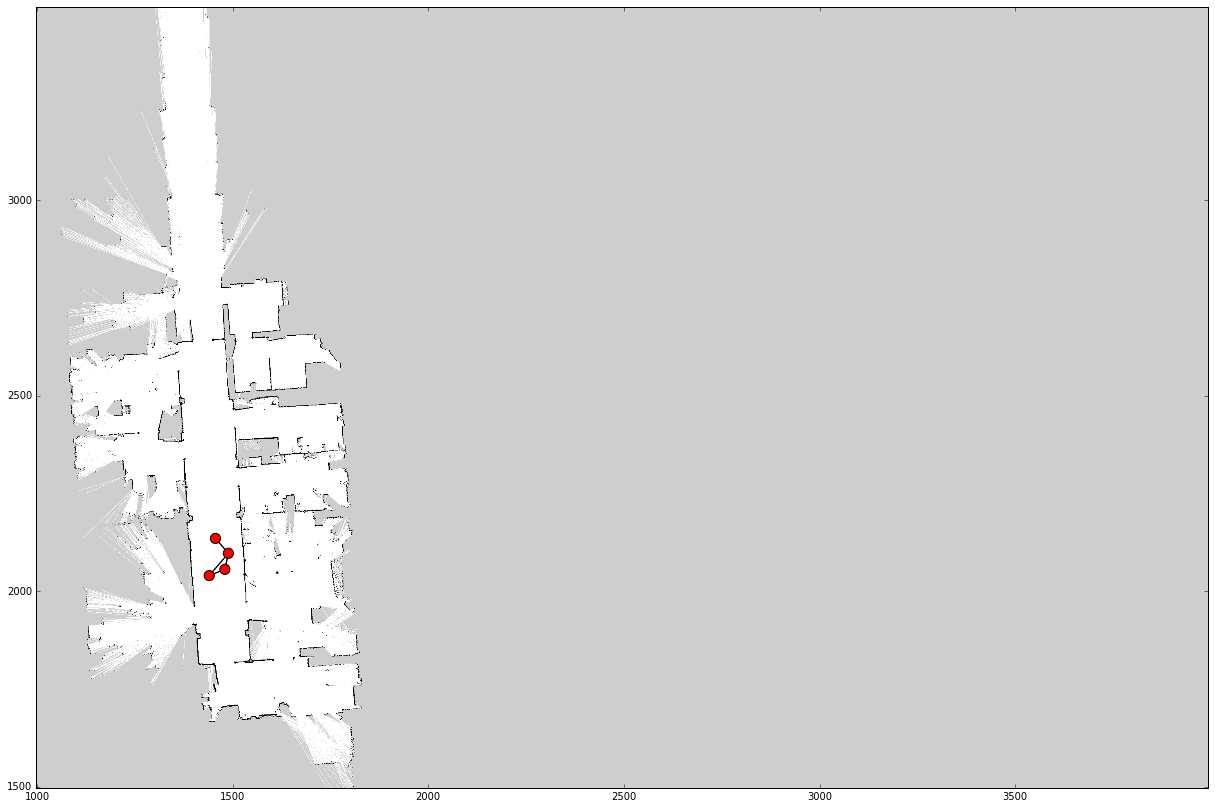

seq1_sunny3-2


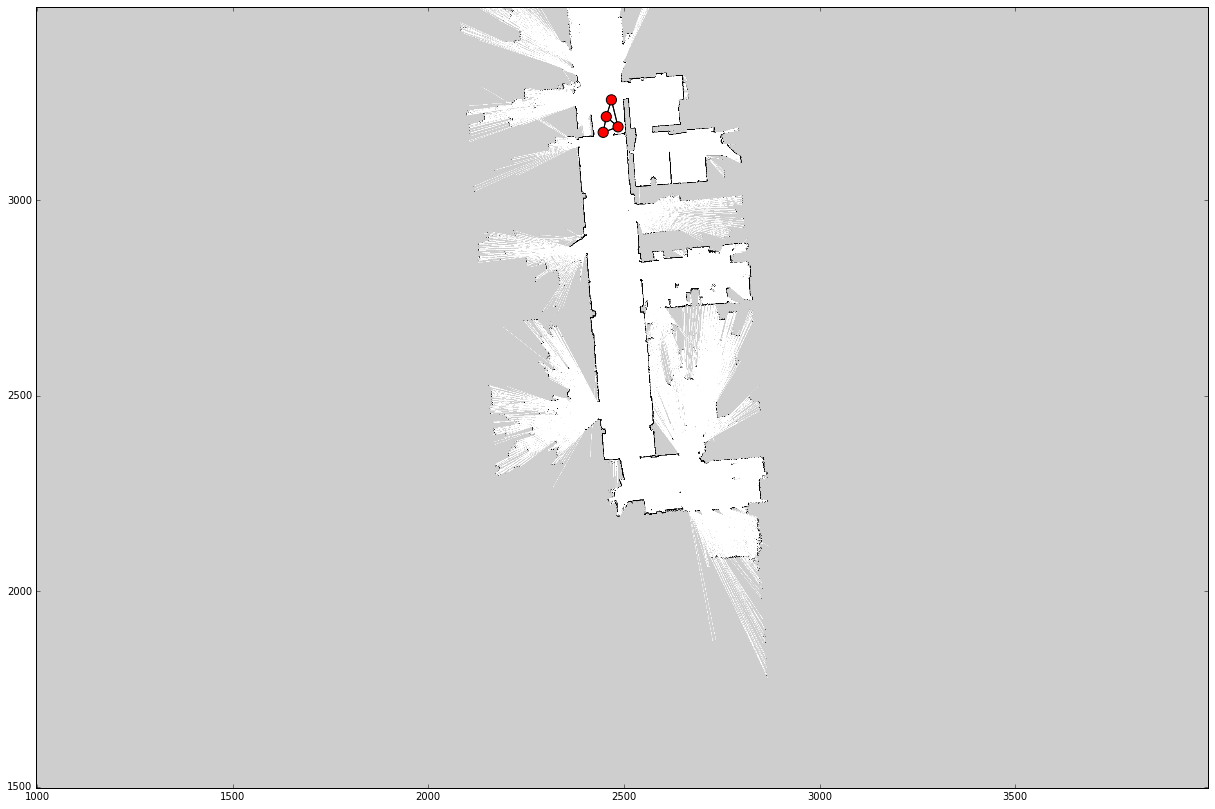

seq2_sunny4-14


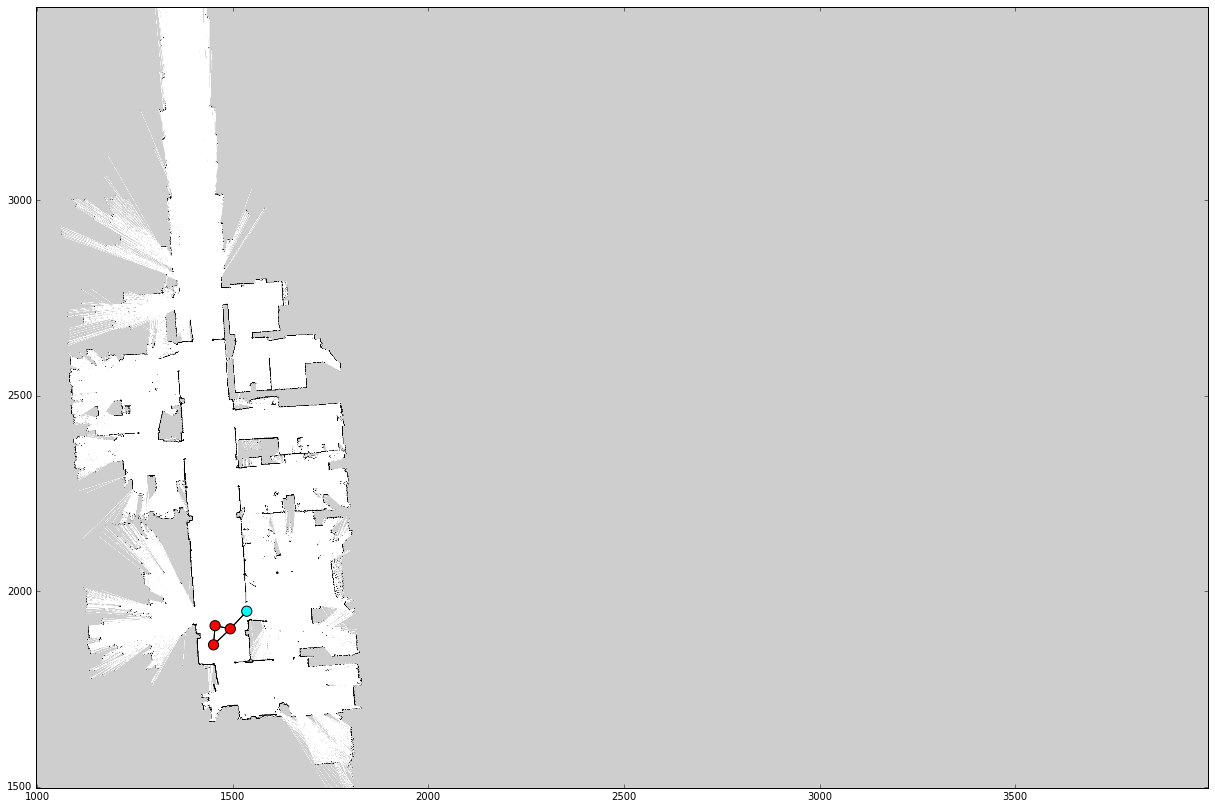

seq1_sunny3-6


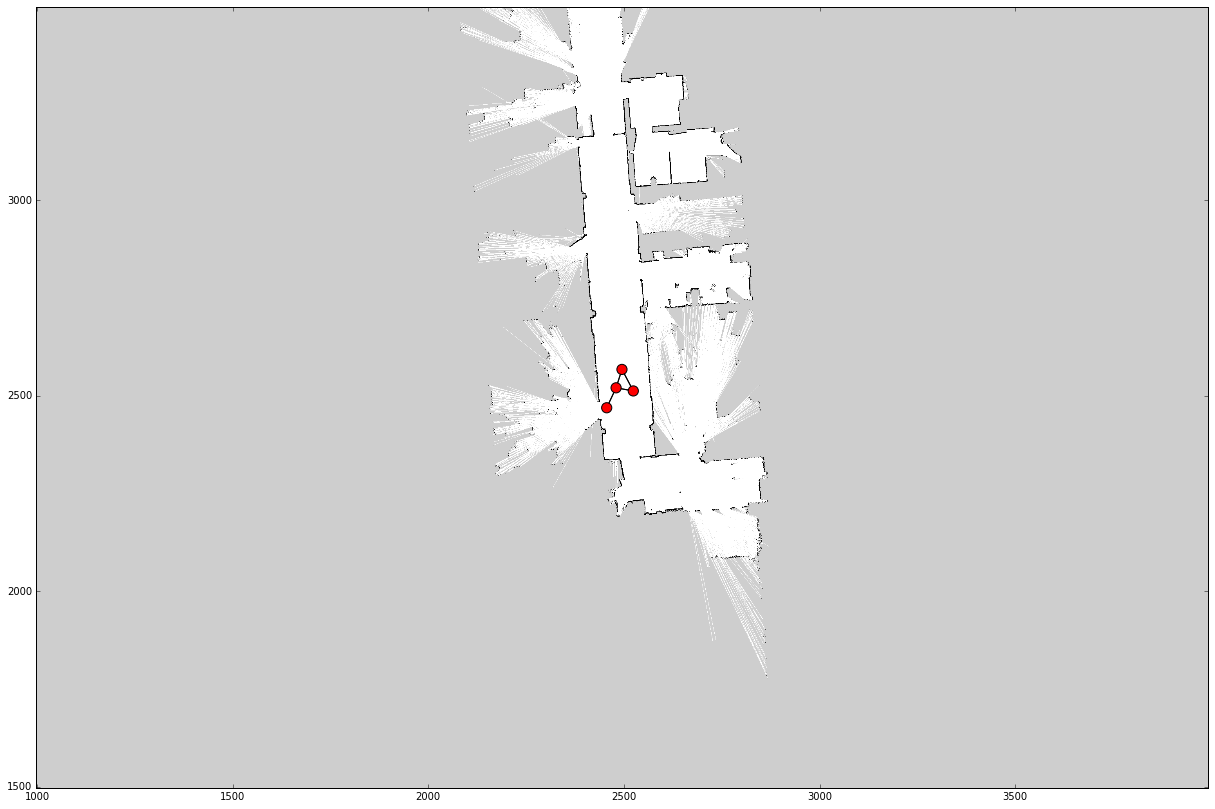

seq1_sunny4-19


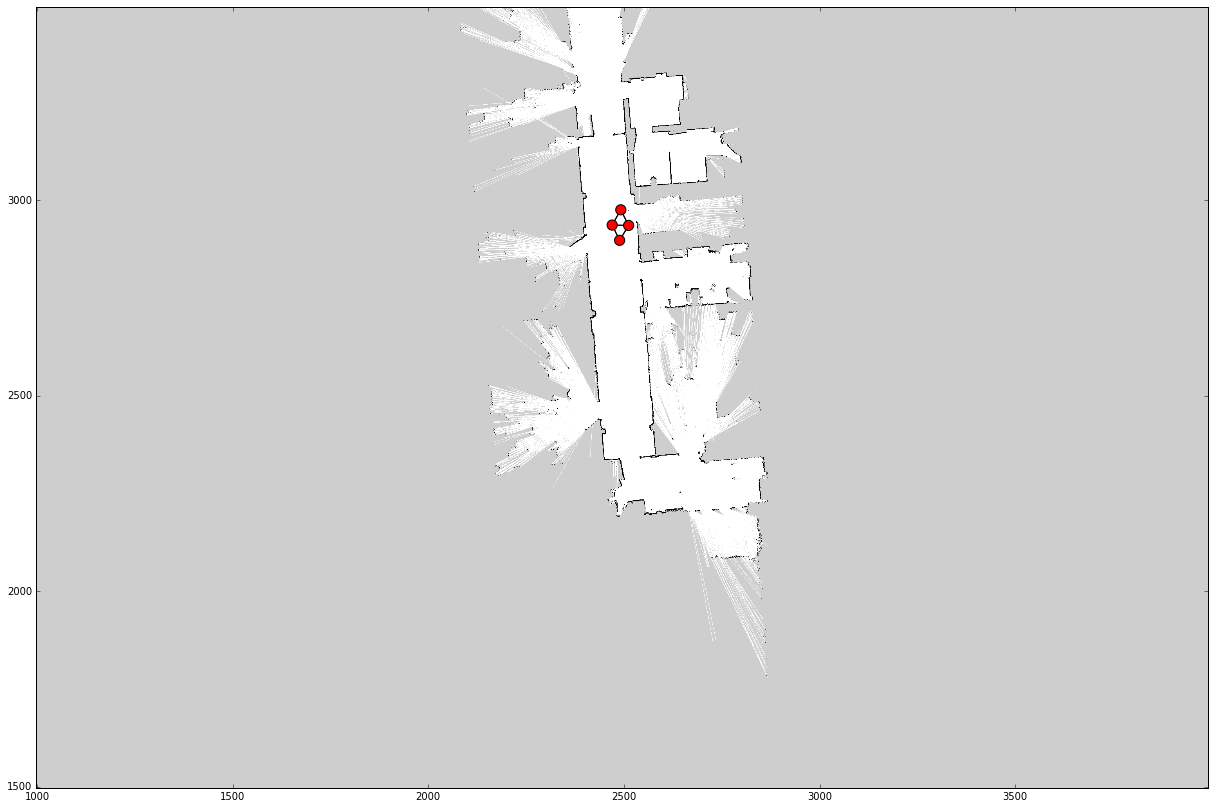

seq2_cloudy1-17


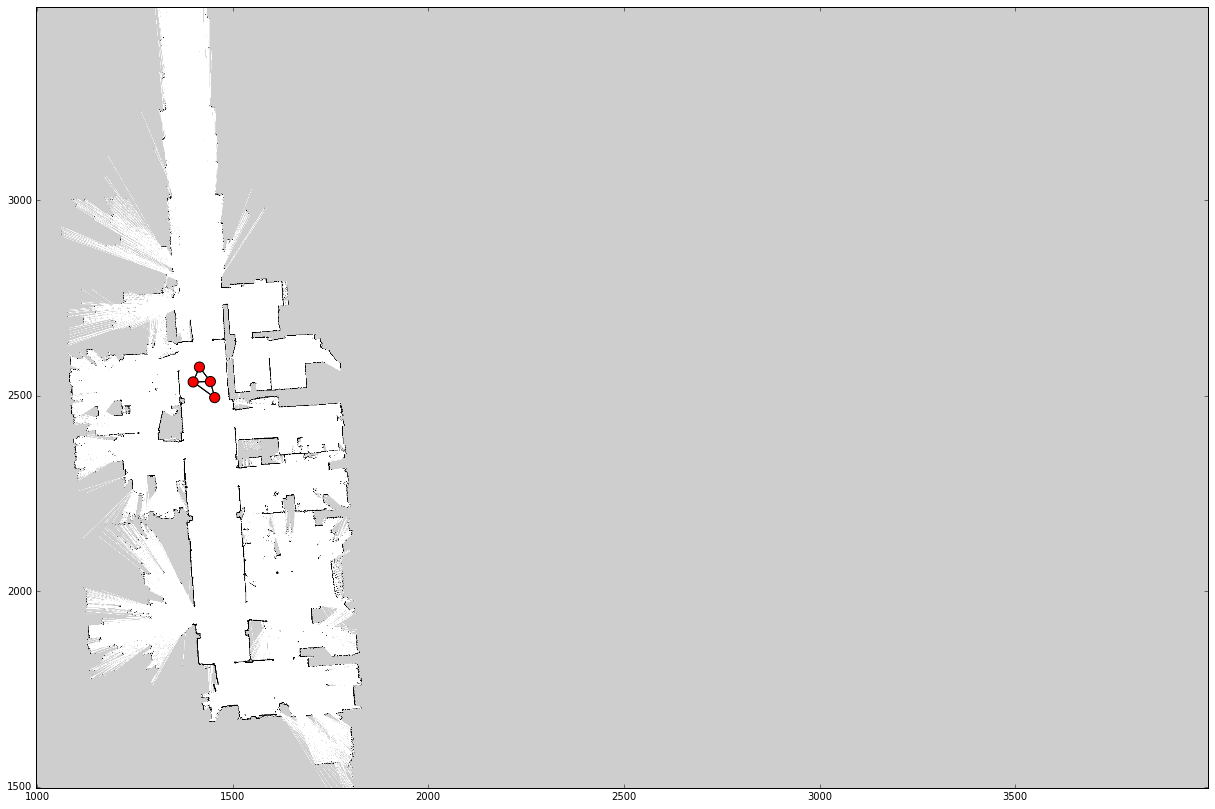

seq1_night3-0


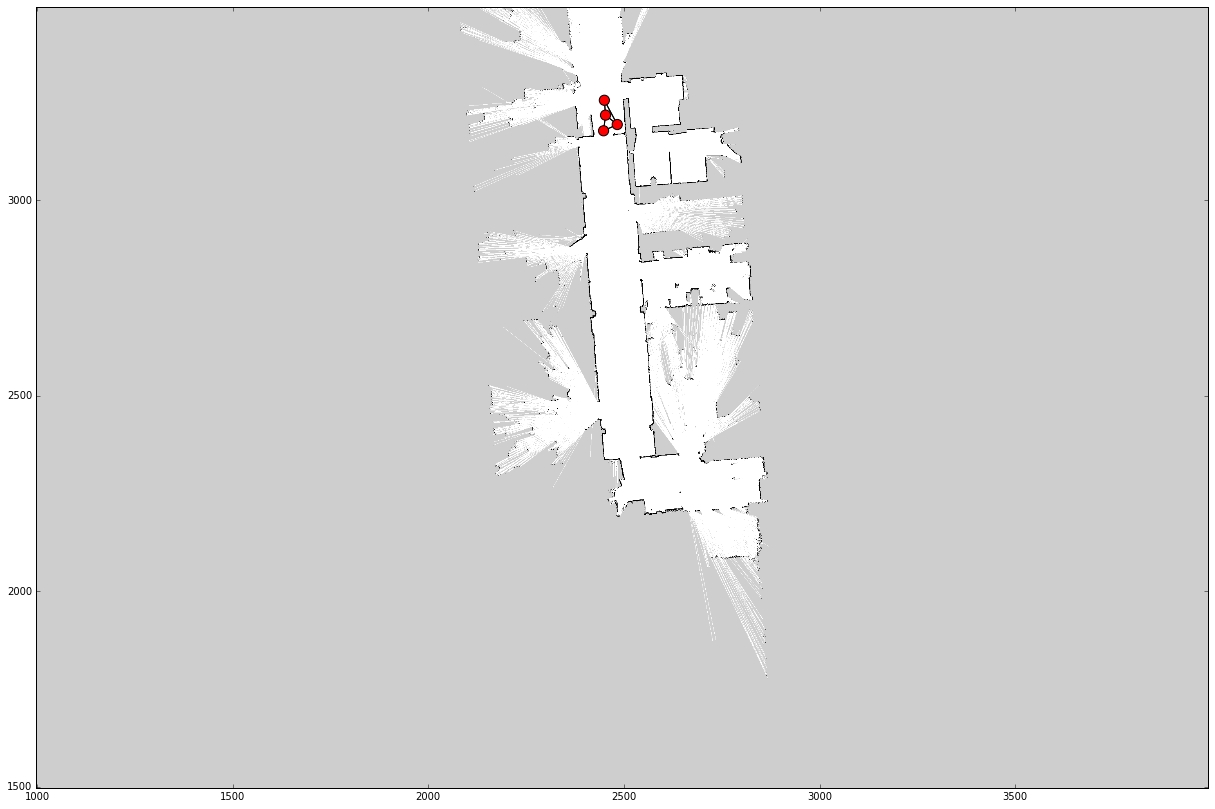

seq2_sunny3-10


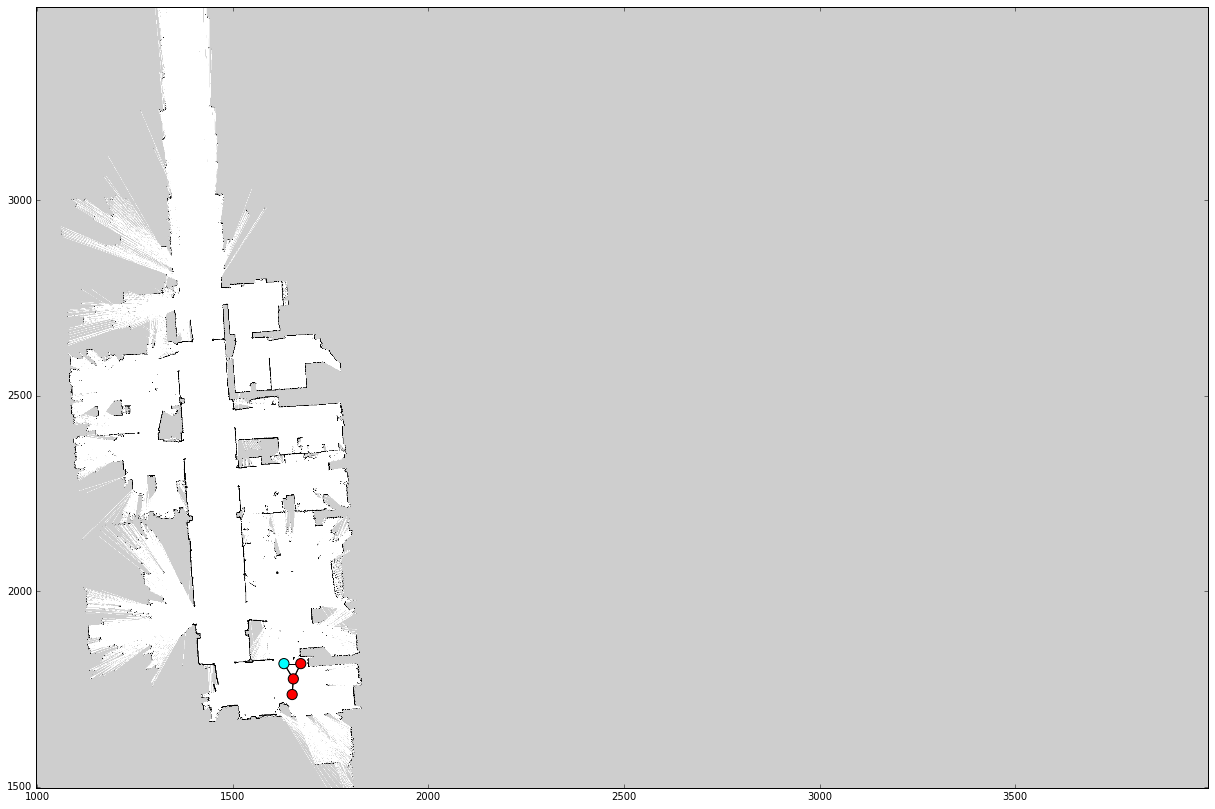

seq2_night1-13


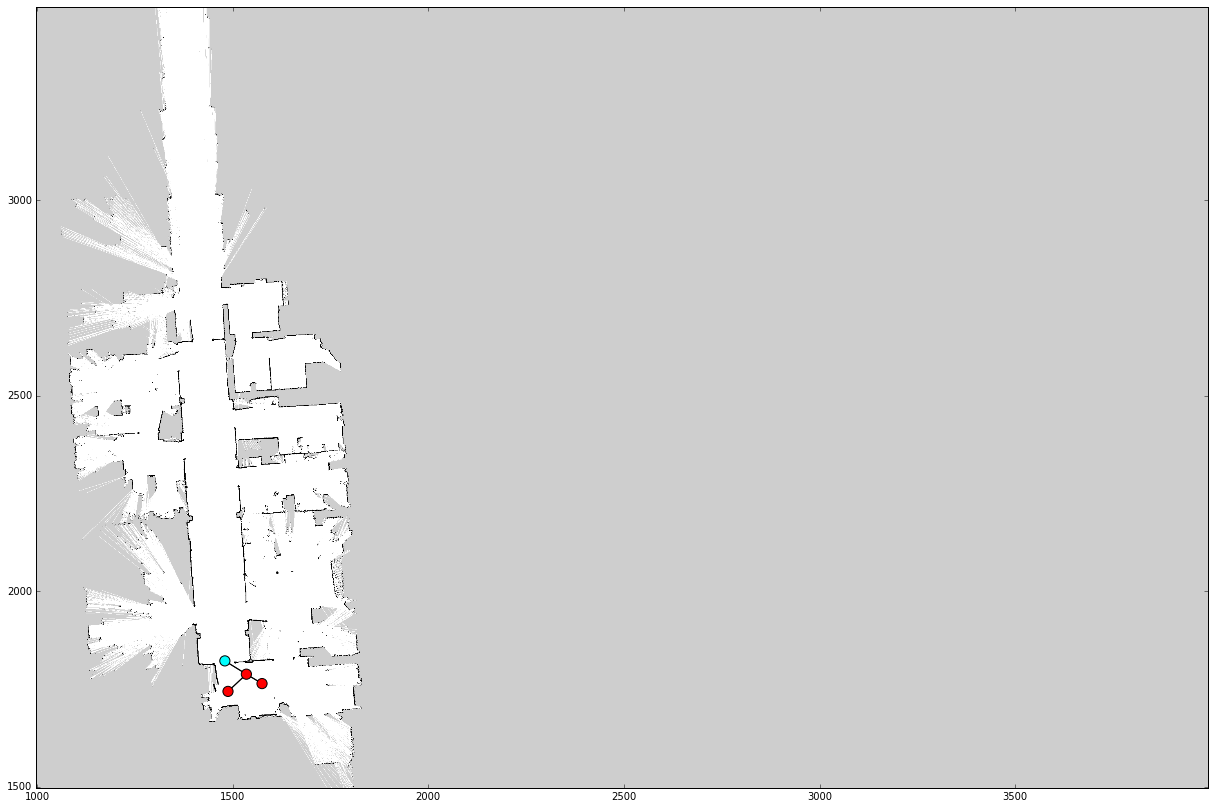

seq1_cloudy2-16


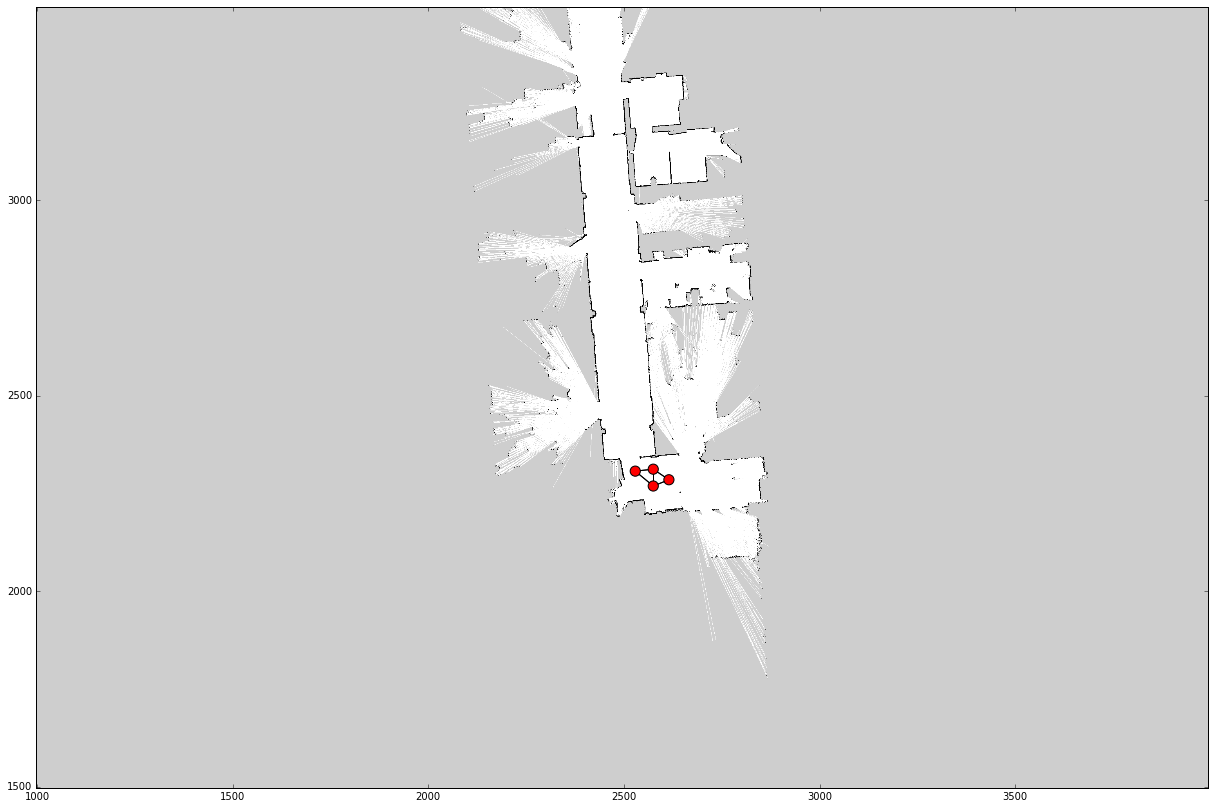

seq1_night1-10


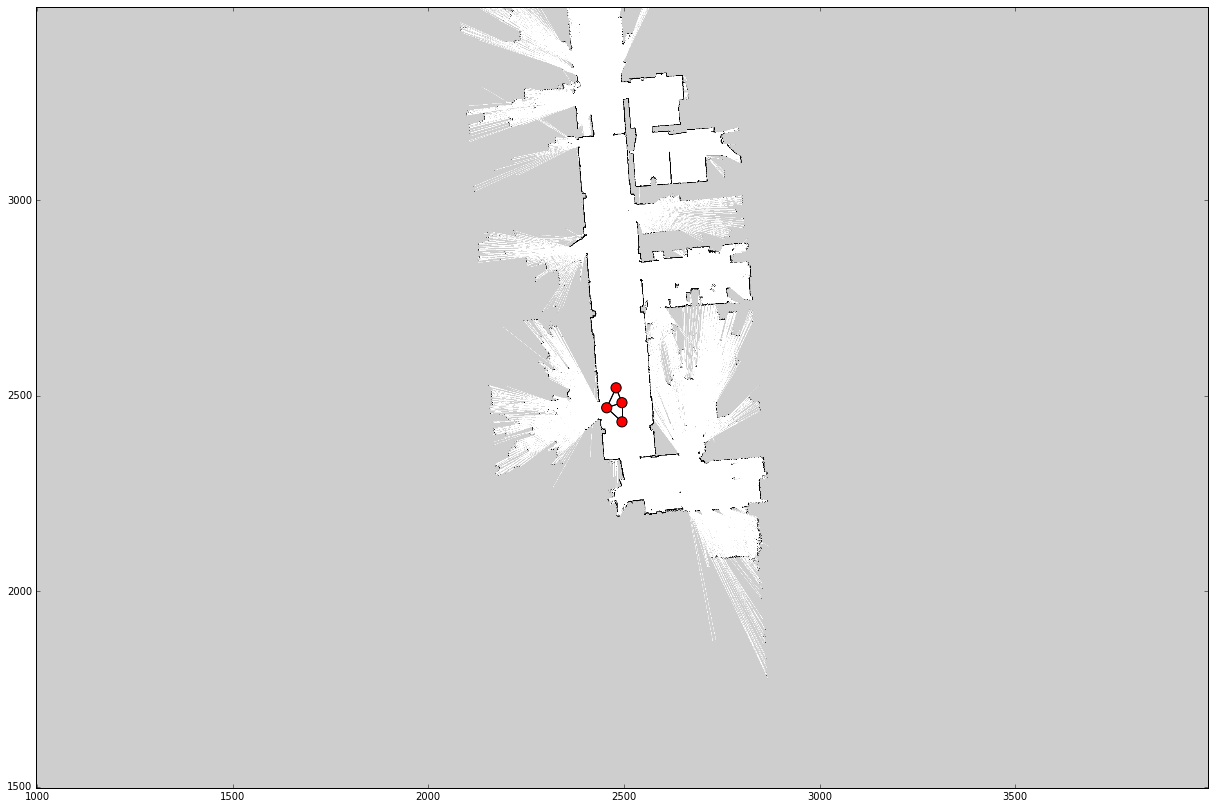

seq1_sunny4-11


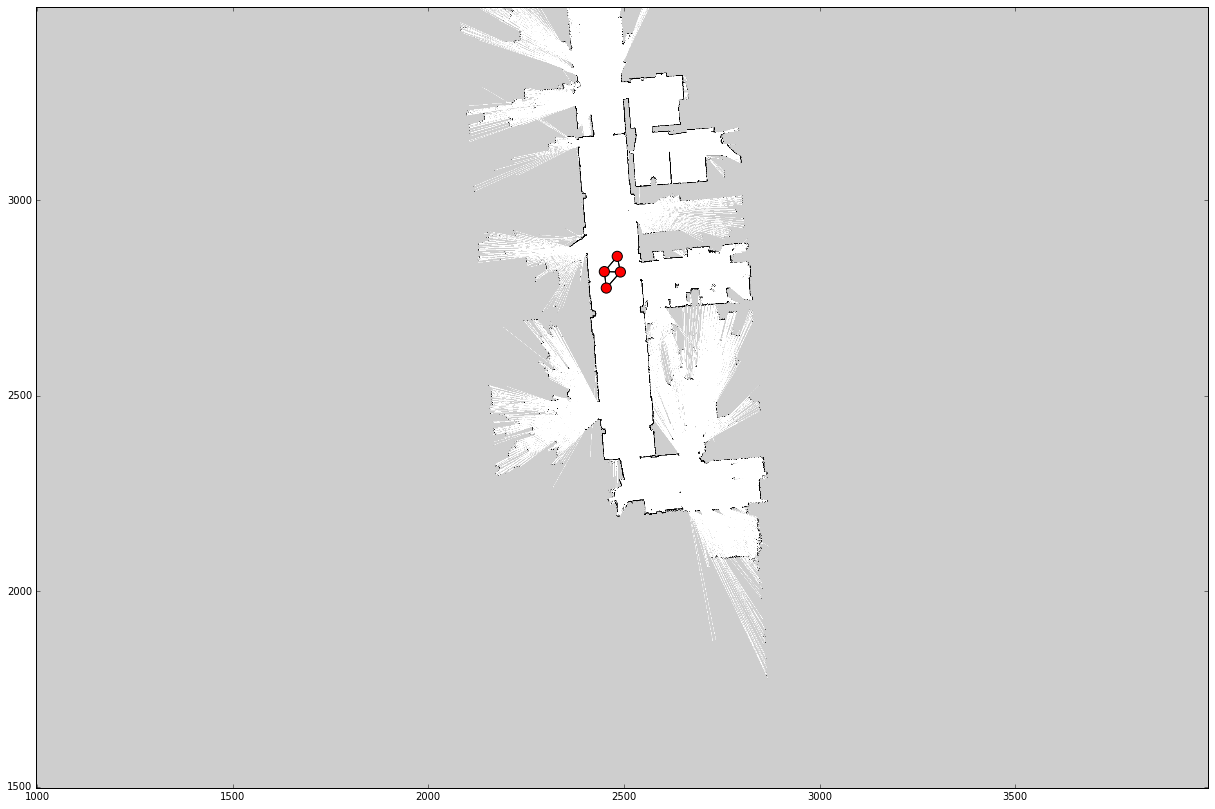

seq1_sunny4-14


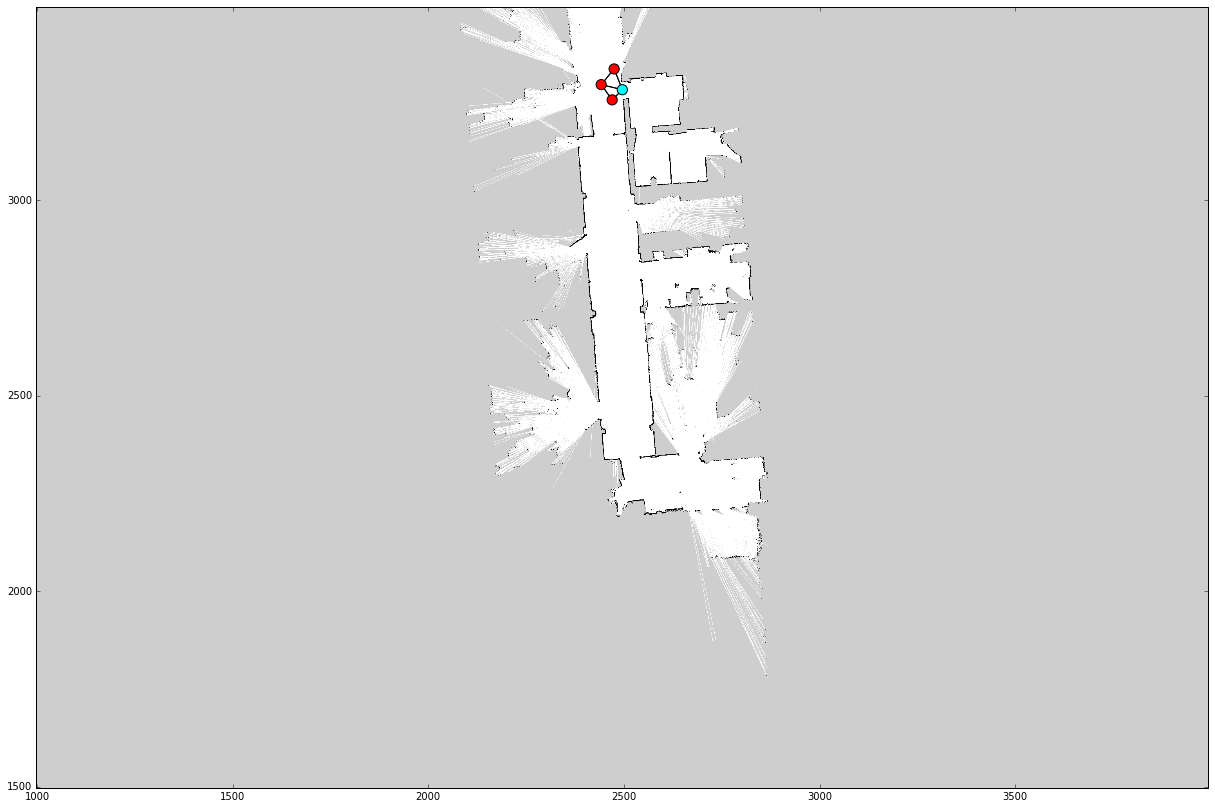

In [10]:
# Visualize them all
ColdMgr = ColdDatabaseManager(test_kwargs['db_name'], COLD_ROOT)
rcParams['figure.figsize'] = 22, 14
for seq_id in test_instances:
    print(seq_id)
    topo_map = test_instances[seq_id]
    topo_map.visualize(plt.gca(), ColdMgr.groundtruth_file(seq_id.split("_")[0], 'map.yaml'))
    plt.show()
    plt.clf()

In [11]:
# Get some typical topo map instances
tree_shaped_seq_id     = "seq1_sunny3-9"
kite_shaped_seq_id     = "seq1_cloudy2-0"
triangle_shaped_seq_id = "seq1_cloudy1-17"
square_shaped_seq_id   = "seq1_sunny4-14"
cross_shaped_seq_id    = "seq1_sunny4-5"
vacuum_shaped_seq_id   = "seq3_sunny1-9"

tree_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=tree_shaped_seq_id)[tree_shaped_seq_id]
kite_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=kite_shaped_seq_id)[kite_shaped_seq_id]
triangle_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=triangle_shaped_seq_id)[triangle_shaped_seq_id]
square_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=square_shaped_seq_id)[square_shaped_seq_id]
cross_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=cross_shaped_seq_id)[cross_shaped_seq_id]
vacuum_shaped = exp.dataset.get_topo_maps(db_name='Freiburg', seq_id=vacuum_shaped_seq_id)[vacuum_shaped_seq_id]

In [12]:
# Create instance spns
spns = [pair_node_spn, single_node_spn]
for template_spn in spns:
    # remove inputs
    template_spn._conc_inputs.set_inputs()

In [13]:
spn_paths = {model.template.__name__:exp.model_save_path(model) for model in spns}
spns_tmpls = [(spns[i], spns[i].template) for i in range(len(spns))]
tree_shaped_spn = InstanceSpn(tree_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                              seq_id = tree_shaped_seq_id, spn_paths=spn_paths, divisions = 8)
print("====")
vacuum_shaped_spn = InstanceSpn(vacuum_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                                seq_id = vacuum_shaped_seq_id, spn_paths=spn_paths, divisions = 8)
print("====")
cross_shaped_spn = InstanceSpn(cross_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                               seq_id = cross_shaped_seq_id, spn_paths=spn_paths, divisions = 8)
print("====")
triangle_shaped_spn = InstanceSpn(triangle_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                                   seq_id = triangle_shaped_seq_id, spn_paths=spn_paths, divisions = 8)
print("====")
square_shaped_spn = InstanceSpn(square_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                                   seq_id = square_shaped_seq_id, spn_paths=spn_paths, divisions = 8)
print("====")
kite_shaped_spn = InstanceSpn(kite_shaped, sess, *spns_tmpls, num_partitions=test_kwargs['num_partitions'],
                                   seq_id = kite_shaped_seq_id, spn_paths=spn_paths, divisions = 8)

Partition 1
Will duplicate PairTemplate 1 times.
Duplicating... 1
Will duplicate SingletonTemplate 2 times.
Duplicating... 1
Duplicating... 2
Partition 2
Will duplicate PairTemplate 1 times.
Duplicating... 1
Will duplicate SingletonTemplate 2 times.
Duplicating... 1
Duplicating... 2
Partition 3
Will duplicate PairTemplate 1 times.
Duplicating... 1
Will duplicate SingletonTemplate 2 times.
Duplicating... 1
Duplicating... 2
Partition 4
Will duplicate PairTemplate 1 times.
Duplicating... 1
Will duplicate SingletonTemplate 2 times.
Duplicating... 1
Duplicating... 2
Partition 5
Will duplicate PairTemplate 1 times.
Duplicating... 1
Will duplicate SingletonTemplate 2 times.
Duplicating... 1
Duplicating... 2
====
Partition 1
Will duplicate PairTemplate 2 times.
Duplicating... 1
Duplicating... 2
Will duplicate SingletonTemplate 0 times.
Partition 2
Will duplicate PairTemplate 2 times.
Duplicating... 1
Duplicating... 2
Will duplicate SingletonTemplate 0 times.
Partition 3
Will duplicate PairTemp

In [14]:
spn.display_spn_graph(tree_shaped_spn._root, skip_params=False)

In [23]:
triangle_shaped_spn._root

Sum_79